In [86]:
!ls

gold_recovery_full_new.csv  gold_recovery_train_new.csv
gold_recovery_test_new.csv  ntb.ipynb


# 1. Подготовьте данные
## 1.1. Откройте файлы и изучите их.

In [119]:
import pandas as pd 
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt 
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (15,7)


In [88]:
train_df = pd.read_csv('gold_recovery_train_new.csv')
test_df = pd.read_csv('gold_recovery_test_new.csv')
full_df = pd.read_csv('gold_recovery_full_new.csv')

In [89]:
dfs = [train_df, test_df, full_df]

## 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [90]:
train_df['rougher.output.recovery'] #то что перепроверям 

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [92]:
#display(train_df.iloc[:, 30:65].head())
display(train_df.iloc[:, 30:65].columns)

Index(['rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floa

сначала нужно посчитть это: 

- C — доля золота в концентрате после флотации/очистки; (+) (rougher.output.feed_au_share)
- F — доля золота в сырье/концентрате до флотации/очистки; (+) (rougher.input.feed_au_share)
- T — доля золота в отвальных хвостах после флотации/очистки.

In [93]:
 #rougher.output.concentrate_au - rougher.input.feed_au - rougher.output.tail_au
train_df[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']]

C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']

train_df['recovery_test'] = (C*(F-T))/(F*(C-T))*100


In [94]:
#появились наны из-за нулей в rougher.output.concentrate_so
train_df[train_df['recovery_test'].isnull()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery_test


In [98]:
#посмотрим что без нанов 
print(mean_absolute_error(train_df.dropna(subset=['recovery_test'])['rougher.output.recovery'], 
                            train_df.dropna(subset=['recovery_test'])['recovery_test']))

9.73512347450521e-15


## 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [99]:
test_df.isnull().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.st

In [101]:
print('columns in train', len(train_df.columns))
print('columns in test', len(test_df.columns))

print(len(set(train_df.columns).difference(set(test_df.columns))))
train_test_dif_cols = set(train_df.columns).difference(set(test_df.columns))

columns in train 88
columns in test 53
35


In [106]:
from pprint import pprint 
pprint(train_test_dif_cols)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery_test',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 

## 1.4. Проведите предобработку данных.

Что можно сделать в предобработке: 

1. удалить из train колонки, которые недоступны в test (позже)
2. Удалить пропуски, если их немного 
3. сбросить дубликаты 

In [107]:
cols = test_df.columns

for df in dfs: 
    #проверка на дубликаты 
    print(len(df.columns))
    #тут пока непонятно, стоит ли до EDA удалять колонки 
    #df = df[cols]
    print(len(df.columns))
    print(df.shape)
    print(df.duplicated().sum())
    print(df.isnull().sum().sort_values(ascending=False))
    

88
88
(14149, 88)
0
secondary_cleaner.output.tail_sol                     1605
rougher.state.floatbank10_e_air                        436
rougher.input.floatbank11_xanthate                     428
primary_cleaner.output.concentrate_sol                 286
secondary_cleaner.state.floatbank2_a_air               217
final.output.concentrate_sol                           211
rougher.input.feed_size                                144
final.output.tail_pb                                   100
rougher.input.feed_pb                                  100
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_pb                   86
rougher.input.feed_sol                                  78
primary_cleaner.output.tail_sol                         46
rougher.input.floatbank11_sulfate                       36
primary_cleaner.input.depressant                        32
rougher.input.floatbank10_sulfate                       29
rougher.output.concentrate_sol      

# 2. Проанализируйте данные


## 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы. (на обучающей выборке)

In [135]:
#словарь столбцов с инпутом и аутпутом в этапах, чтобы проще было ковыряться в этом безобразии
l_cols = {}

for l in ['rougher', 'primary_cleaner',
           'secondary_cleaner', 'final']:
    
    l_cols[l] = {}
    l_cols[l]['input'] = []
    l_cols[l]['output'] = []

    print(l)
    
    for col in full_df.columns:

        if l == col.split('.')[0] and col.split('.')[1] == 'input':
            l_cols[l]['input'].append(col)
        elif l == col.split('.')[0] and col.split('.')[1] == 'output':
            l_cols[l]['output'].append(col)
        else:
            continue

rougher
primary_cleaner
secondary_cleaner
final


### rougher

In [118]:
l_cols['rougher']['output']

['rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au']

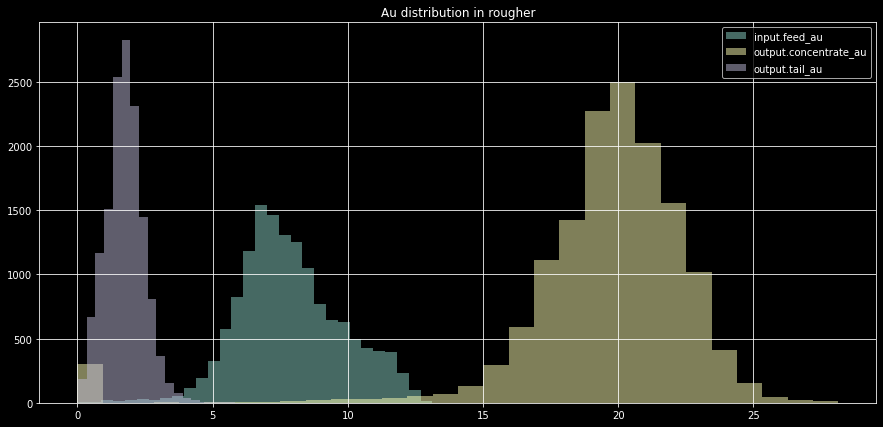

In [130]:
train_df['rougher.input.feed_au'].hist(alpha = 0.5, bins = 30)
train_df['rougher.output.concentrate_au'].hist(alpha = 0.5, bins = 30)
train_df['rougher.output.tail_au'].hist(alpha = 0.5, bins =30)
plt.title('Au distribution in rougher')
plt.legend(['input.feed_au', 'output.concentrate_au', 'output.tail_au'])
plt.show()

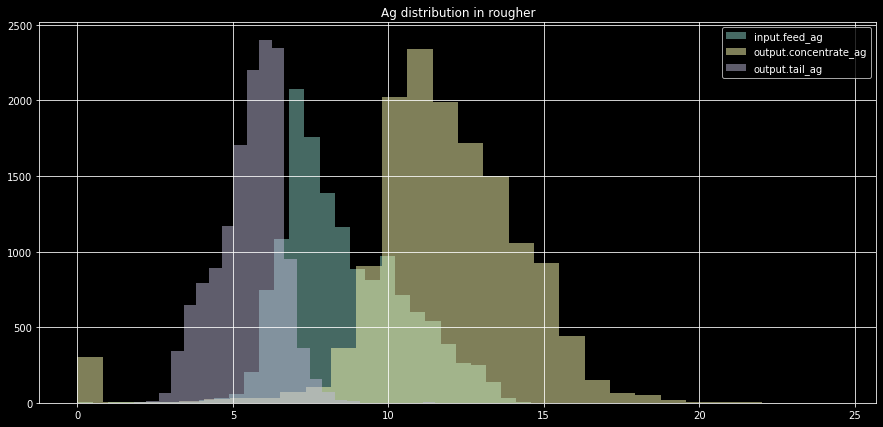

In [131]:
train_df['rougher.input.feed_ag'].hist(alpha = 0.5, bins = 30)
train_df['rougher.output.concentrate_ag'].hist(alpha = 0.5, bins = 30)
train_df['rougher.output.tail_ag'].hist(alpha = 0.5, bins =30)
plt.title('Ag distribution in rougher')
plt.legend(['input.feed_ag', 'output.concentrate_ag', 'output.tail_ag'])
plt.show()

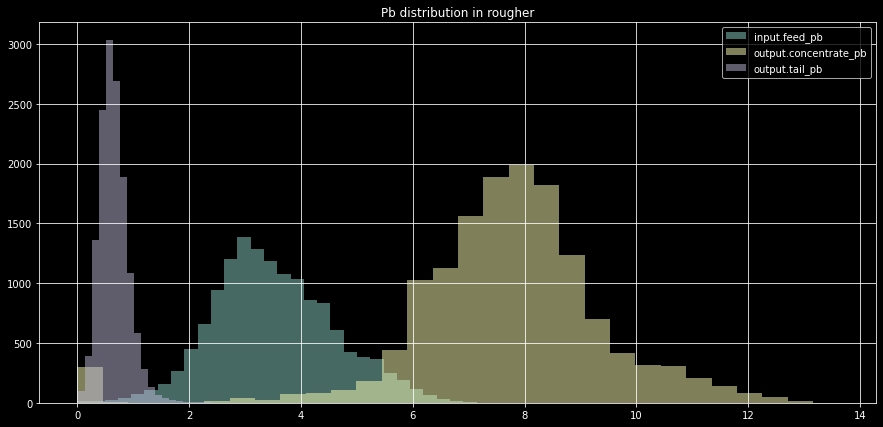

In [153]:
train_df['rougher.input.feed_pb'].hist(alpha = 0.5, bins = 30)
train_df['rougher.output.concentrate_pb'].hist(alpha = 0.5, bins = 30)
train_df['rougher.output.tail_pb'].hist(alpha = 0.5, bins =30)
plt.title('Pb distribution in rougher')
plt.legend(['input.feed_pb', 'output.concentrate_pb', 'output.tail_pb'])
plt.show()

Получается, что даже первый этап грубой очистки уже справляется со своей работой. 

Особенно хорошо он справляется с золотом и свинцом, хуже справляется с серебром при этом. 

### primary_cleaner

In [141]:
l_cols['primary_cleaner']

{'input': ['primary_cleaner.input.sulfate',
  'primary_cleaner.input.depressant',
  'primary_cleaner.input.feed_size',
  'primary_cleaner.input.xanthate'],
 'output': ['primary_cleaner.output.concentrate_ag',
  'primary_cleaner.output.concentrate_pb',
  'primary_cleaner.output.concentrate_sol',
  'primary_cleaner.output.concentrate_au',
  'primary_cleaner.output.tail_ag',
  'primary_cleaner.output.tail_pb',
  'primary_cleaner.output.tail_sol',
  'primary_cleaner.output.tail_au']}

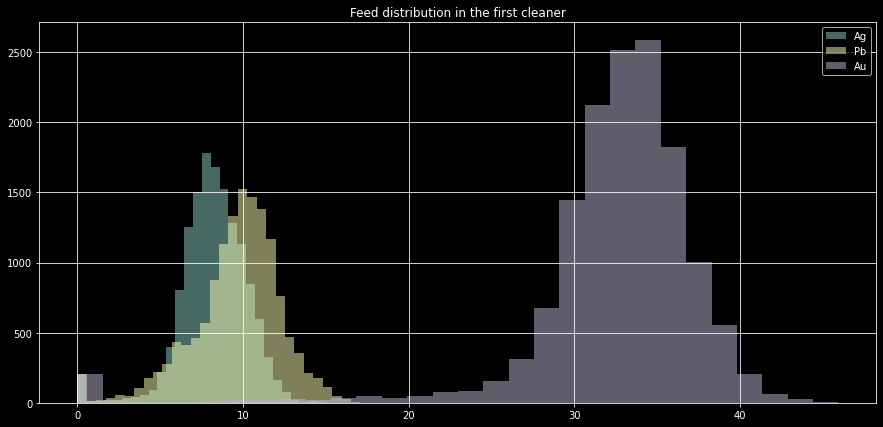

In [157]:
#сравним что получилось после первого этапа чистки по металлам 
train_df['primary_cleaner.output.concentrate_ag'].hist(alpha = 0.5, bins = 30)
train_df['primary_cleaner.output.concentrate_pb'].hist(alpha = 0.5, bins = 30)
train_df['primary_cleaner.output.concentrate_au'].hist(alpha = 0.5, bins =30)
plt.title('Feed distribution in the first cleaner')
plt.legend(['Ag', 'Pb', 'Au'])
plt.show()

Видно, что на этом этапе очень сильно удается выделить из входящей массы серебро

### secondary cleaner

In [142]:
l_cols['secondary_cleaner']

{'input': [],
 'output': ['secondary_cleaner.output.tail_ag',
  'secondary_cleaner.output.tail_pb',
  'secondary_cleaner.output.tail_sol',
  'secondary_cleaner.output.tail_au']}

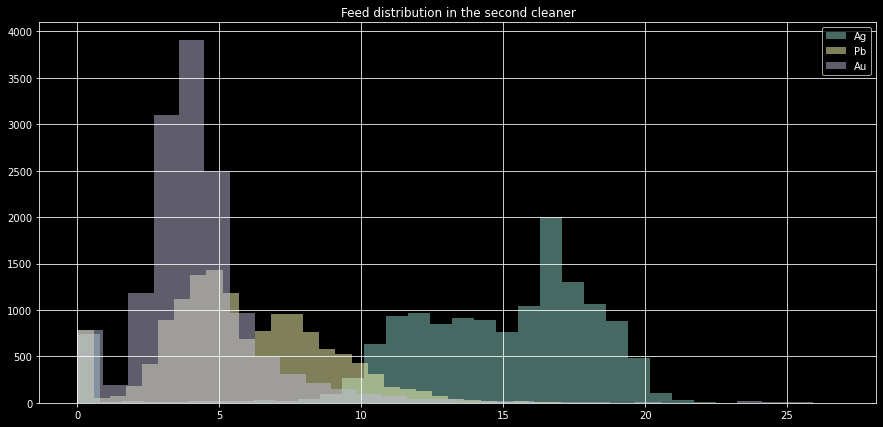

In [156]:
#сравним что получилось после второго этапа чистки по металлам 
train_df['secondary_cleaner.output.tail_ag'].hist(alpha = 0.5, bins = 30)
train_df['secondary_cleaner.output.tail_pb'].hist(alpha = 0.5, bins = 30)
train_df['secondary_cleaner.output.tail_au'].hist(alpha = 0.5, bins =30)
plt.title('Feed distribution in the second cleaner')
plt.legend(['Ag', 'Pb', 'Au'])
plt.show()

на вторичном этапе очистки довольно большой % серебра уходит в остатки, меньше всего в остатки уходит золото

### final

In [151]:
l_cols['final']

{'input': [],
 'output': ['final.output.concentrate_ag',
  'final.output.concentrate_pb',
  'final.output.concentrate_sol',
  'final.output.concentrate_au',
  'final.output.recovery',
  'final.output.tail_ag',
  'final.output.tail_pb',
  'final.output.tail_sol',
  'final.output.tail_au']}

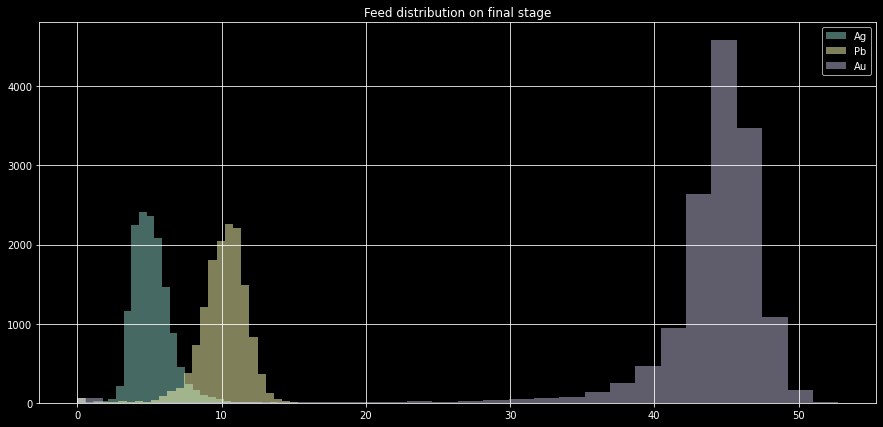

In [158]:
#сравним что получилось после второго этапа чистки по металлам 
train_df['final.output.concentrate_ag'].hist(alpha = 0.5, bins = 30)
train_df['final.output.concentrate_pb'].hist(alpha = 0.5, bins = 30)
train_df['final.output.concentrate_au'].hist(alpha = 0.5, bins =30)
plt.title('Feed distribution on final stage')
plt.legend(['Ag', 'Pb', 'Au'])
plt.show()

на финальном этапе вообще красота, % золота очень сильно подросла и колеблется в основном от 40% до 50%. 

будем считать, что система очистки справляется со своей работой 

## 2.2 Сравните распределения размеров гранул сырья на обучающей и тестовой выборках.  Если распределения сильно отличаются друг от друга, оценка модели будет  неправильной

In [168]:
#посмотрим какие колонки у нас есть в тестовой 
[col for col in test_df.columns if col.split('.')[-1]=='feed_size']

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [171]:
#а какие в обучающей 
[col for col in train_df.columns if col.split('.')[-1]=='feed_size']

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

сравнить мы можем две одинаковые стадии между собой: отдельно rougher и первичный клинер

60.11051805066844 -- средний размер гранул в трейн выборке
55.951097447596965 -- средний размер гранул в тест выборке
55.37388507888542 -- медиана гранул в трейн выборке
50.841029192879 -- медиана размер гранул в тест выборке


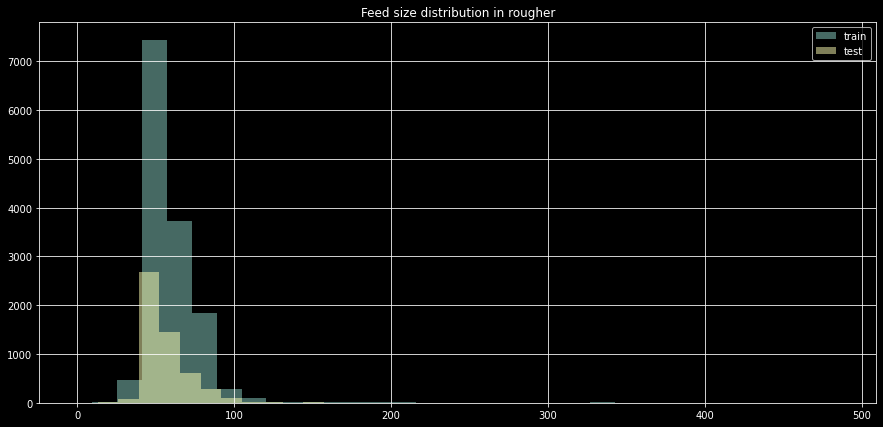

In [181]:
#сравним что получилось после второго этапа чистки по металлам 

print(train_df['rougher.input.feed_size'].mean(), '-- средний размер гранул в трейн выборке')
print(test_df['rougher.input.feed_size'].mean(), '-- средний размер гранул в тест выборке')

print(train_df['rougher.input.feed_size'].median(), '-- медиана гранул в трейн выборке')
print(test_df['rougher.input.feed_size'].median(), '-- медиана размер гранул в тест выборке')

train_df['rougher.input.feed_size'].hist(alpha = 0.5, bins = 30)
test_df['rougher.input.feed_size'].hist(alpha = 0.5, bins = 30)
plt.title('Feed size distribution in rougher')
plt.legend(['train', 'test'])
plt.show()

из-за выбросов в feed_size в трейн выборке не очень приятно сравнивать распределения, посмотрим без них

58.71075089900921 -- средний размер гранул в трейн выборке
55.388305241565845 -- средний размер гранул в тест выборке
55.26017512380482 -- медиана гранул в трейн выборке
50.75667403647809 -- медиана размер гранул в тест выборке


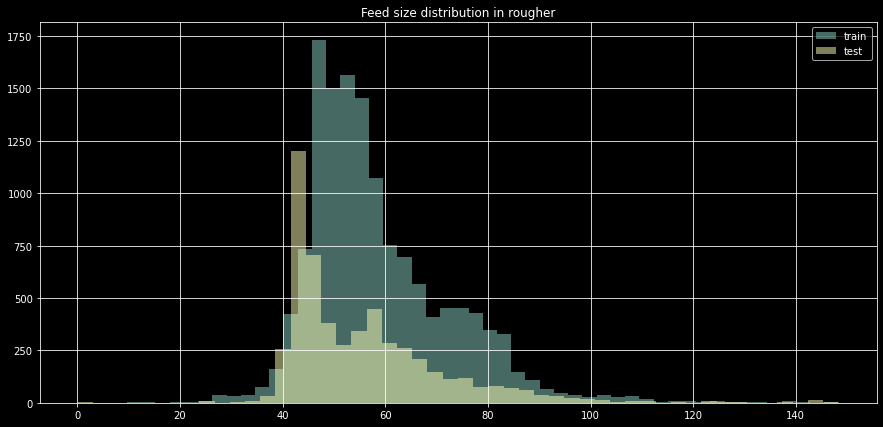

In [185]:
#сравним что получилось после второго этапа чистки по металлам, немного призумимся
print(train_df[train_df['rougher.input.feed_size']<150]['rougher.input.feed_size'].mean(), '-- средний размер гранул в трейн выборке')
print(test_df[test_df['rougher.input.feed_size']<150]['rougher.input.feed_size'].mean(), '-- средний размер гранул в тест выборке')

print(train_df[train_df['rougher.input.feed_size']<150]['rougher.input.feed_size'].median(), '-- медиана гранул в трейн выборке')
print(test_df[test_df['rougher.input.feed_size']<150]['rougher.input.feed_size'].median(), '-- медиана размер гранул в тест выборке')


train_df[train_df['rougher.input.feed_size']<150]['rougher.input.feed_size'].hist(alpha = 0.5, bins = 50)
test_df[test_df['rougher.input.feed_size']<150]['rougher.input.feed_size'].hist(alpha = 0.5, bins = 50)
plt.title('Feed size distribution in rougher')
plt.legend(['train', 'test'])
plt.show()

Распределение отличаюются, но все же скорее похожи друг на друга (оба смещены скорее влево). При этом надо отметить, что периодически залетают булыжники в массу сырья

## 2.3 Исследуйте суммарную концентрацию всех веществ на разных стадиях:  в сырье, в черновом и финальном концентратах

In [187]:
#а какие в обучающей 
[col for col in train_df.columns if col.split('.')[-1].split('_')[0]=='concentrate']

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

### rougher

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,total_conc
0,11.500771,7.101074,28.029297,19.793808,66.424950
1,11.615865,7.278807,28.067063,20.050975,67.012710
2,11.695753,7.216833,27.454037,19.737170,66.103793
3,11.915047,7.175616,27.341277,19.320810,65.752751
4,12.411054,7.240205,27.041023,19.216101,65.908382


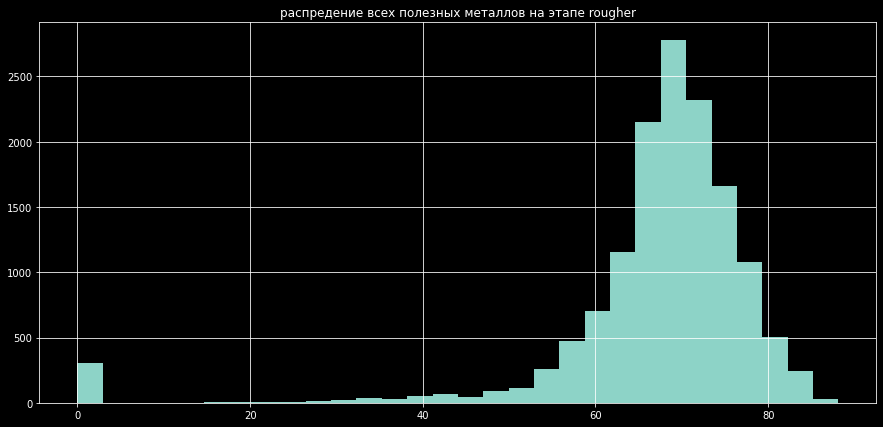

In [196]:
rougher_conc_df = train_df[['rougher.output.concentrate_ag',
                            'rougher.output.concentrate_pb',
                            'rougher.output.concentrate_sol',
                            'rougher.output.concentrate_au']].copy()

rougher_conc_df['total_conc'] = rougher_conc_df.sum(axis=1)
display(rougher_conc_df.head())

rougher_conc_df['total_conc'].hist(bins = 30)
plt.title('распредение всех полезных металлов на этапе rougher')
plt.show()

### primary_cleaner

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,total_conc
0,8.547551,10.389648,19.529297,34.174427,72.640924
1,8.558743,10.497069,19.369147,34.118526,72.543485
2,8.603505,10.354494,19.167579,33.969464,72.095042
3,7.221879,8.496563,15.978538,28.260743,59.957723
4,9.089428,9.986786,19.199864,33.044932,71.321010


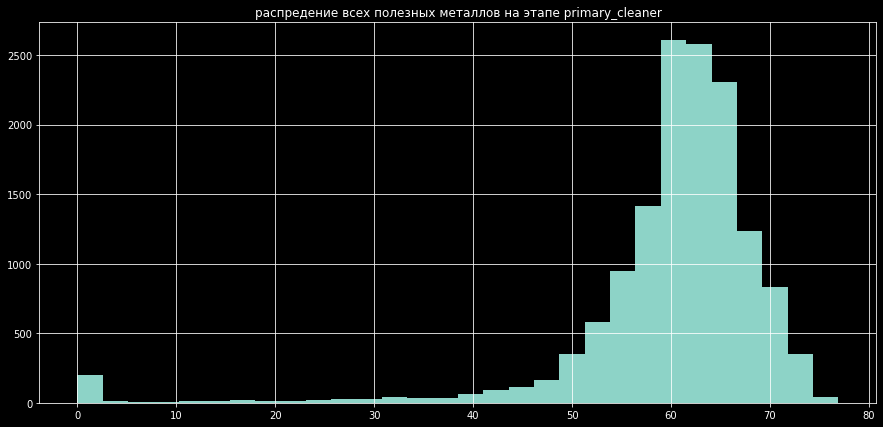

In [197]:
primary_cleaner_conc_df = train_df[['primary_cleaner.output.concentrate_ag',
                            'primary_cleaner.output.concentrate_pb',
                            'primary_cleaner.output.concentrate_sol',
                            'primary_cleaner.output.concentrate_au']].copy()

primary_cleaner_conc_df['total_conc'] = primary_cleaner_conc_df.sum(axis=1)
display(primary_cleaner_conc_df.head())

primary_cleaner_conc_df['total_conc'].hist(bins = 30)
plt.title('распредение всех полезных металлов на этапе primary_cleaner')
plt.show()

### secondary cleaner

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,total_conc
0,6.055403,9.889648,5.507324,42.192020,63.644396
1,6.029369,9.968944,5.257781,42.701629,63.957723
2,6.055926,10.213995,5.383759,42.657501,64.311180
3,6.047977,9.977019,4.858634,42.689819,63.573449
4,6.148599,10.142511,4.939416,42.774141,64.004667


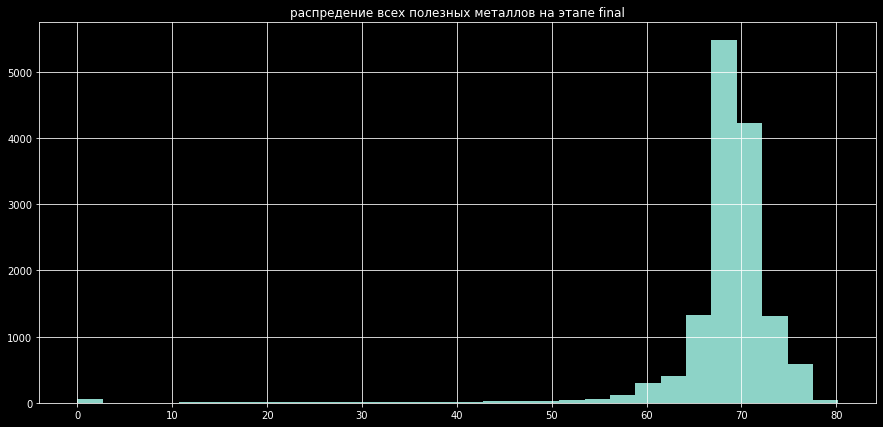

In [201]:
final_conc_df = train_df[['final.output.concentrate_ag',
                            'final.output.concentrate_pb',
                            'final.output.concentrate_sol',
                            'final.output.concentrate_au']].copy()

final_conc_df['total_conc'] = final_conc_df.sum(axis=1)
display(final_conc_df.head())

final_conc_df['total_conc'].hist(bins = 30)
plt.title('распредение всех полезных металлов на этапе final')
plt.show()

### total

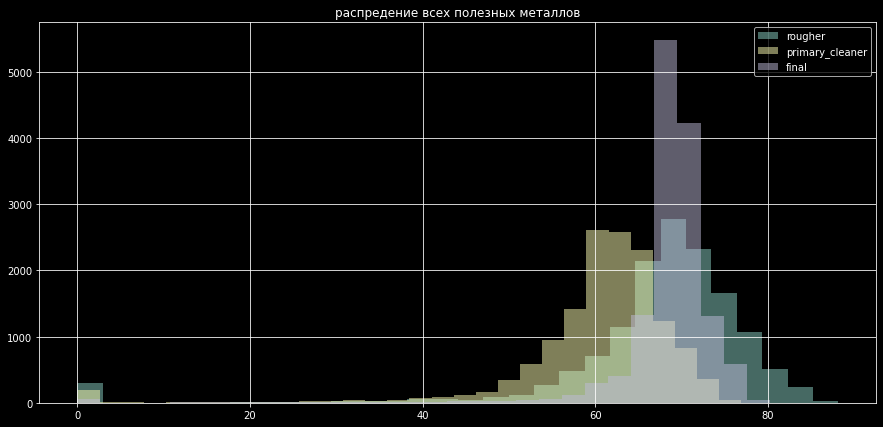

In [206]:
rougher_conc_df['total_conc'].hist(bins = 30, alpha = 0.5)
primary_cleaner_conc_df['total_conc'].hist(bins = 30, alpha = 0.5)
final_conc_df['total_conc'].hist(bins = 30, alpha = 0.5)
plt.legend(['rougher', 'primary_cleaner', 'final'])
plt.title('распредение всех полезных металлов')
plt.show()

# Modeling